In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
df = pd.read_csv('data.csv', encoding='latin1')

/tmp/ipykernel_252/1625864943.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', encoding='latin1')


In [4]:
df.info

<bound method DataFrame.info of        stn_code       sampling_date                        state   location  \
0         150.0  February - M021990               Andhra Pradesh  Hyderabad   
1         151.0  February - M021990               Andhra Pradesh  Hyderabad   
2         152.0  February - M021990               Andhra Pradesh  Hyderabad   
3         150.0     March - M031990               Andhra Pradesh  Hyderabad   
4         151.0     March - M031990               Andhra Pradesh  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP            24-12-15                  West Bengal   ULUBERIA   
435738     SAMP            29-12-15                  West Bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN                 NaN                  Lakshadweep        NaN   
435741      NaN                 NaN                      Tripura        NaN   

                   

In [6]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
df_cleaned=df[['so2','no2','spm','date']]

In [11]:
df_cleaned=df_cleaned.dropna()

In [12]:
df_cleaned

,so2,no2,spm,date
11,3.9,14.1,133.0,1990-06-01
12,5.6,11.8,82.0,1990-06-01
13,3.3,19.3,111.0,1990-06-01
14,3.9,8.2,118.0,1990-07-01
15,3.5,12.1,135.0,1990-07-01
...,...,...,...,...
431453,8.0,54.0,50.0,2013-03-14
431454,9.0,49.0,54.0,2013-03-19
431455,7.0,47.0,50.0,2013-03-22
431456,7.0,50.0,53.0,2013-03-27


/tmp/ipykernel_252/3108015853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])


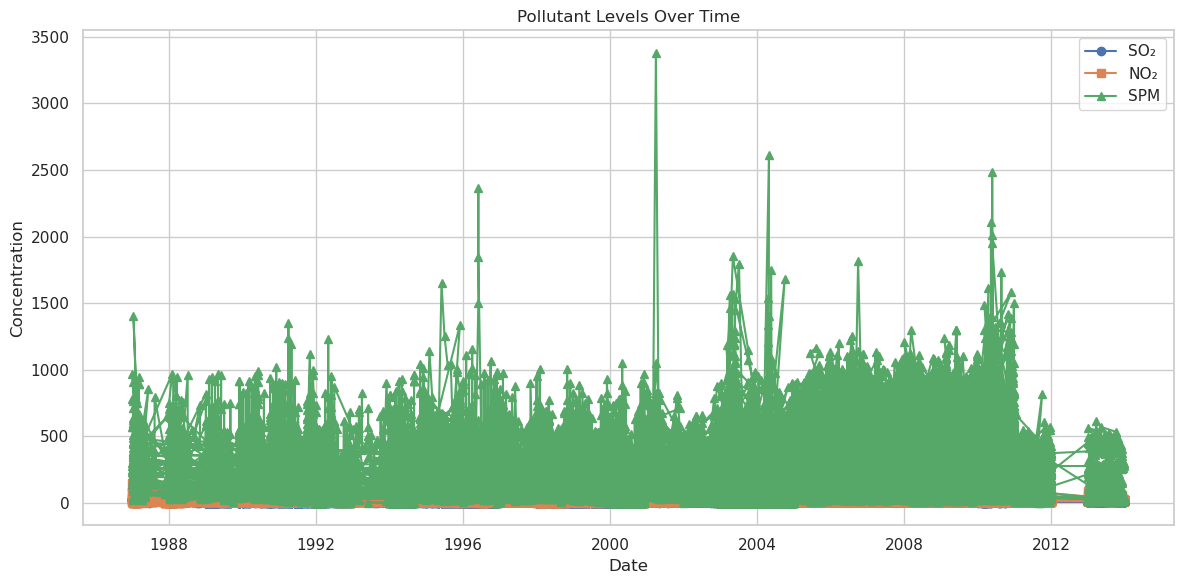

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['date'], df_cleaned['so2'], label='SO₂', marker='o')
plt.plot(df_cleaned['date'], df_cleaned['no2'], label='NO₂', marker='s')
plt.plot(df_cleaned['date'], df_cleaned['spm'], label='SPM', marker='^')

plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Pollutant Levels Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

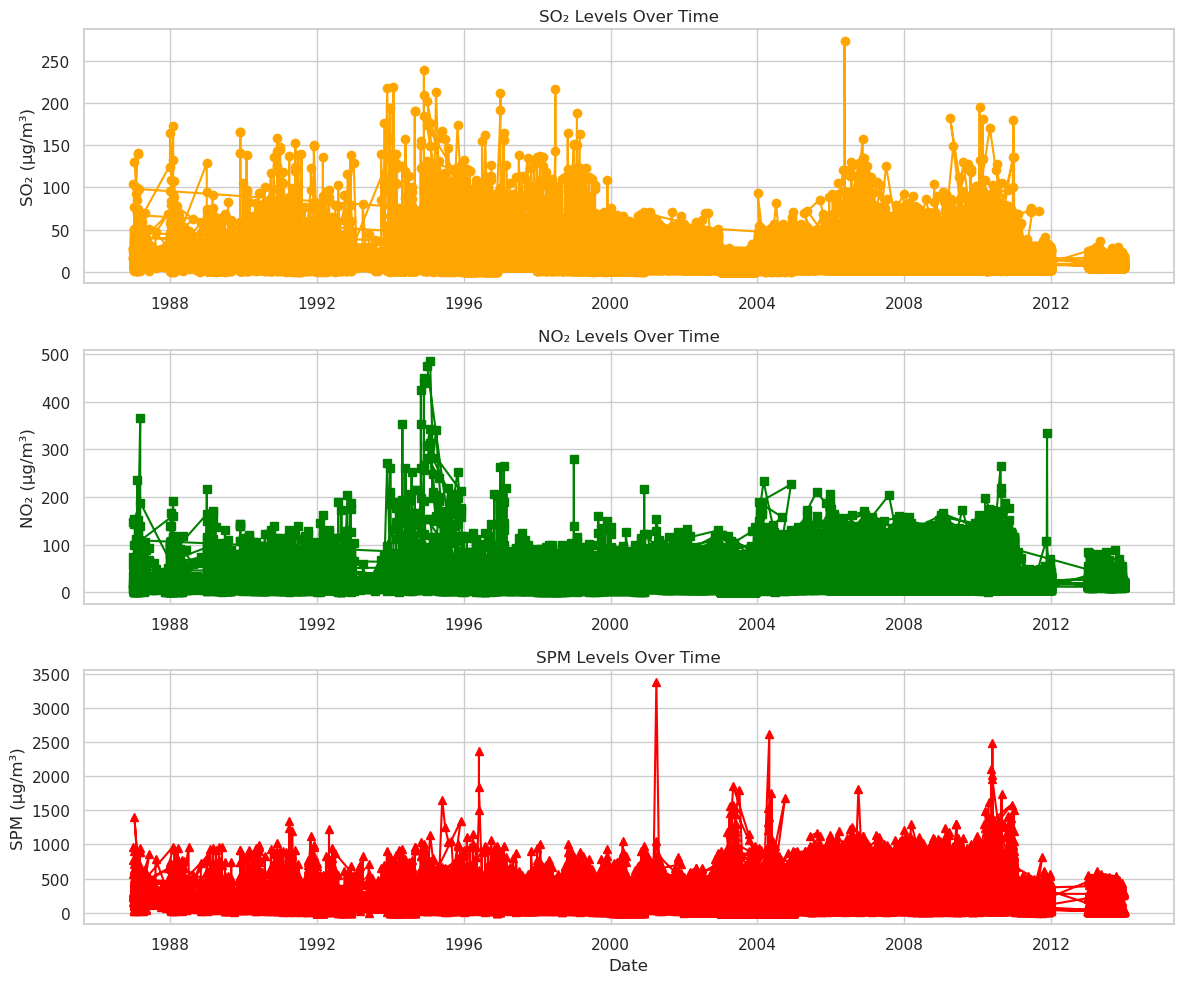

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Set up subplots
plt.figure(figsize=(12, 10))

# SO2 Plot
plt.subplot(3, 1, 1)
plt.plot(df_cleaned['date'], df_cleaned['so2'], label='SO₂', color='orange', marker='o')
plt.ylabel('SO₂ (µg/m³)')
plt.title('SO₂ Levels Over Time')
plt.grid(True)

# NO2 Plot
plt.subplot(3, 1, 2)
plt.plot(df_cleaned['date'], df_cleaned['no2'], label='NO₂', color='green', marker='s')
plt.ylabel('NO₂ (µg/m³)')
plt.title('NO₂ Levels Over Time')
plt.grid(True)

# SPM Plot
plt.subplot(3, 1, 3)
plt.plot(df_cleaned['date'], df_cleaned['spm'], label='SPM', color='red', marker='^')
plt.xlabel('Date')
plt.ylabel('SPM (µg/m³)')
plt.title('SPM Levels Over Time')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [23]:
df_cleaned.info

<bound method DataFrame.info of         so2   no2    spm       date
11      3.9  14.1  133.0 1990-06-01
12      5.6  11.8   82.0 1990-06-01
13      3.3  19.3  111.0 1990-06-01
14      3.9   8.2  118.0 1990-07-01
15      3.5  12.1  135.0 1990-07-01
...     ...   ...    ...        ...
431453  8.0  54.0   50.0 2013-03-14
431454  9.0  49.0   54.0 2013-03-19
431455  7.0  47.0   50.0 2013-03-22
431456  7.0  50.0   53.0 2013-03-27
431457  7.0  47.0   47.0 2013-03-30

[170704 rows x 4 columns]>

In [24]:
print(df_cleaned.dtypes)


so2            float64
no2            float64
spm            float64
date    datetime64[ns]
dtype: object


In [25]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

/tmp/ipykernel_252/957268366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])


In [26]:
df_so2 = df_cleaned[['date', 'so2']].rename(columns={'date': 'ds', 'so2': 'y'})
model_so2 = Prophet()
model_so2.fit(df_so2)

10:45:19 - cmdstanpy - INFO - Chain [1] start processing
10:46:29 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
df_no2 = df_cleaned[['date', 'no2']].rename(columns={'date': 'ds', 'no2': 'y'})
model_no2 = Prophet()
model_no2.fit(df_no2)

10:47:00 - cmdstanpy - INFO - Chain [1] start processing
10:47:49 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
df_spm = df_cleaned[['date', 'spm']].rename(columns={'date': 'ds', 'spm': 'y'})
model_spm = Prophet()
model_spm.fit(df_spm)

10:49:39 - cmdstanpy - INFO - Chain [1] start processing
